$\huge{\textbf{Dinamika HF2 megoldó}} - \huge{near731}$

# Ábra:

## $F_x$=$F_y$=0

<img src="dinhf2_abra.png"/>

In [1]:
#Imports

import numpy as np
import sympy as sp
import math
import sympy as sp
import math
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)


$\Large{\textbf{Adatok:}}$

In [2]:
#Symbols

phi_1,phi_3,l_1,l_2,l_3,omega,omega2_z,omega3_z,epszilon_2z,epszilon_3z,m_1,m_2,m_3,g=sp.symbols("phi_1,phi_3,l_1,l_2,l_3,omega,omega2_z,omega3_z,epszilon_2z,epszilon_3z,m_1,m_2,m_3,g")
F_Ax,F_Ay,F_Bx,F_By,F_Cx,F_Cy,F_Dx,F_Dy,M_z=sp.symbols("F_Ax,F_Ay,F_Bx,F_By,F_Cx,F_Cy,F_Dx,F_Dy,M_z")
theta_S2,theta_S3=sp.symbols("theta_S2,theta_S3")
#Adatok

phi_1_adat=float(input("phi_1="))*np.pi/180 #fok
phi_3_adat=60*np.pi/180 #fok
l_1_adat=float(input("l_1=")) #m
l_2_adat=float(input("l_2=")) #m
l_3_adat=float(input("l_3=")) #m
omega_z=float(input("omega_z")) #1/s
omega_adat=sp.Matrix([0,0,omega_z]) #rad/s
m_1_adat=float(input("m_1=")) #kg
m_2_adat=float(input("m_2=")) #kg
m_3_adat=float(input("m_3=")) #kg
g_adat=9.81 #m/s^2

data=[(phi_1,phi_1_adat),(phi_3,phi_3_adat),(l_1,l_1_adat),(l_2,l_2_adat),(l_3,l_3_adat),(omega,omega_adat),
(m_1,m_1_adat),(m_2,m_2_adat),(m_3,m_3_adat),(g,g_adat)]

$\Large{\textbf{1.Feladatrész}:} \\$
$\large{\textbf{Súlypontok gyorsulásának kiszámítása:}}$

1.feladatrész

a_S1(m/s^2):


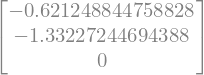

|a_S1|: 1.47000000000000 m/s^2

a_S2(m/s^2):


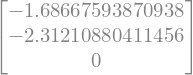

|a_S2|: 2.86194389258162 m/s^2

a_S3(m/s^2):


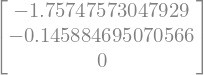

|a_S3|: 1.76352014093390 m/s^2


In [3]:
#1.feladatrész

print("1.feladatrész")

v_A=sp.Matrix([0,0,0])
v_D=sp.Matrix([0,0,0])

#Vectors

r_AB=sp.Matrix([(l_1_adat*np.cos(phi_1_adat)),(l_1_adat*np.sin(phi_1_adat)),0])

r_BC=sp.Matrix([(np.sqrt((l_2_adat)**2-(l_3_adat+l_3_adat*np.cos(phi_3_adat))**2)),
l_3_adat+l_3_adat*np.cos(phi_3_adat),0])

r_CD=sp.Matrix([-(l_3_adat*np.sin(phi_3_adat)),l_3_adat+l_3_adat*np.cos(phi_3_adat),0])

r_BS2=sp.Matrix([(np.sqrt((l_2_adat)**2-(l_3_adat+l_3_adat*np.cos(phi_3_adat))**2))/2,
((l_3_adat+l_3_adat*np.cos(phi_3_adat))/2),0])

#Velocity

omega_2=sp.Matrix([0,0,omega2_z])
omega_3=sp.Matrix([0,0,omega3_z])

v_B=sp.Matrix(v_A+omega_adat.cross(r_AB))

v_C1=sp.Matrix(v_B+omega_2.cross(r_BC))
v_C2=sp.Matrix(v_D+omega_3.cross(r_CD))

#Equations

ans=solve(v_C1-v_C2, [omega2_z,omega3_z])

omega2_z=omega2_z.subs(ans)
omega3_z=omega3_z.subs(ans)

omega_2=omega_2.subs(ans)
omega_3=omega_3.subs(ans)

v_C=v_C1.subs(ans)

v_S1=sp.Matrix(v_A+omega_adat.cross(r_AB/2))

v_S2=sp.Matrix(v_B+omega_2.cross(r_BS2))

#Accelaration

a_A=sp.Matrix([0,0,0])
epszilon_1=sp.Matrix([0,0,0])

a_B = -omega_adat.dot(omega_adat) * r_AB

#Csak radiális

r_DS3 = sp.Matrix([0,l_3_adat,0])
v_S3 = omega_3.cross(r_DS3)


a_D=sp.Matrix([0,omega3_z**2*l_3_adat-v_S3.norm()**2/(4*l_3_adat),0])

epszilon_2=sp.Matrix([0,0,epszilon_2z])
epszilon_3=sp.Matrix([0,0,epszilon_3z])

a_C1=a_B+epszilon_2.cross(r_BC)-omega_2.dot(omega_2)*r_BC
a_C2=a_D+epszilon_3.cross(r_CD)-omega_3.dot(omega_3)*r_CD

ans=solve(a_C1-a_C2,[epszilon_2z,epszilon_3z])

epszilon_2=epszilon_2.subs(ans)
epszilon_3=epszilon_3.subs(ans)

epszilon_2z=epszilon_2z.subs(ans)
epszilon_3z=epszilon_3z.subs(ans)

a_C1=a_C1.subs(ans)

#S1 Accelaration

a_S1=-omega_adat.dot(omega_adat)*r_AB/2

print("\na_S1(m/s^2):")
display(a_S1)

a_S1_abs=sp.sqrt(a_S1.dot(a_S1))
print("|a_S1|:",a_S1_abs,"m/s^2")


#S2 Accelaration

a_S2=a_B+epszilon_2.cross(r_BS2)-omega_2.dot(omega_2)*r_BS2

print("\na_S2(m/s^2):")
display(a_S2)

a_S2_abs=sp.sqrt(a_S2.dot(a_S2))
print("|a_S2|:",a_S2_abs,"m/s^2")

#S3 Accelaration

a_S3=a_D+epszilon_3.cross(r_DS3)-omega_3.dot(omega_3)*r_DS3

print("\na_S3(m/s^2):")
display(a_S3)

a_S3_abs=sp.sqrt(a_S3.dot(a_S3))
print("|a_S3|:",a_S3_abs,"m/s^2")

$\Large{\textbf{2.Feladatrész}:} \\$

2.feladatrész:

Tehetetlenségi nyomatékok:
theta_S1= 0.0014999999999999998 [kg*m^2]
theta_S2= 0.025724999999999994 [kg*m^2]
theta_S3= 0.025000000000000005 [kg*m^2]

Egyenletek felírása:


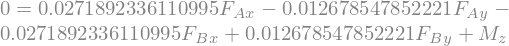

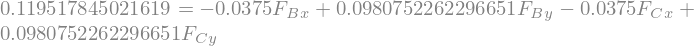

In [4]:
#2.feladatrész

print("2.feladatrész:")

print("\nTehetetlenségi nyomatékok:")

theta_S1_adat=1/12*m_1_adat*l_1_adat**2
print("theta_S1=",theta_S1_adat,"[kg*m^2]")

theta_S2_adat=1/12*m_2_adat*l_2_adat**2
print("theta_S2=",theta_S2_adat,"[kg*m^2]")

theta_S3_adat=1/2*m_3_adat*l_3_adat**2
print("theta_S3=",theta_S3_adat,"[kg*m^2]")

#1.test

eq_1_x=Eq(m_1_adat*a_S1[0],F_Ax+F_Bx)
eq_1_y=Eq(m_1_adat*a_S1[1],F_Ay+F_By-m_1_adat*g_adat)
eq_1_z=Eq(0,F_Ax*(l_1_adat)/2*np.sin(phi_1_adat)+F_By*(l_1_adat)/2*np.cos(phi_1_adat)-F_Ay*(l_1_adat)/2*np.cos(phi_1_adat)-F_Bx*(l_1_adat)/2*np.sin(phi_1_adat)+M_z)

#2.test

eq_2_x=Eq(m_2_adat*a_S2[0],F_Cx-F_Bx)
eq_2_y=Eq(m_2_adat*a_S2[1],F_Cy-F_By-m_2_adat*g_adat)

k_1=(l_3_adat*(1+np.cos(phi_3_adat)))/2
k_2=np.sqrt(l_2_adat**2-(2*k_1)**2)/2

eq_2_z=Eq(theta_S2_adat*epszilon_2[2],k_1*(-F_Bx-F_Cx)+k_2*(F_By+F_Cy))

#3.test

eq_3_x=Eq(m_3_adat*a_S3[0],F_Dx-F_Cx)
eq_3_y=Eq(m_3_adat*a_S3[1],F_Dy-F_Cy-m_3_adat*g_adat)
eq_3_z=Eq(theta_S3_adat*epszilon_3[2],F_Dx*l_3_adat+F_Cy*l_3_adat*np.sin(phi_3_adat)+F_Cx*l_3_adat*np.cos(phi_3_adat))

print("\nEgyenletek felírása:")
display(eq_1_x,eq_1_y,eq_1_z,eq_2_x,eq_2_y,eq_2_z,eq_3_x,eq_3_y,eq_3_z)

$\Large{\textbf{3.Feladatrész}:} \\$

In [5]:
#3.feladatrész

print("3.feladatrész:")

ans=solve((eq_1_x,eq_1_y,eq_1_z,eq_2_x,eq_2_y,eq_2_z,eq_3_x,eq_3_y,eq_3_z),(F_Ax,F_Ay,F_Bx,F_By,F_Cx,F_Cy,F_Dx,F_Dy,M_z))

print("\nIsmeretlen erők és nyomatékok:")

#print("\nF_Ax[N]=")
F_Ax=F_Ax.subs(ans)
#display(F_Ax)

#print("\nF_Ay[N]=")
F_Ay=F_Ay.subs(ans)
#display(F_Ay)

#print("\nF_Bx[N]=")
F_Bx=F_Bx.subs(ans)
#display(F_Bx)

#print("\nF_By[N]=")
F_By=F_By.subs(ans)
#display(F_By)

#print("\nF_Cx[N]=")
F_Cx=F_Cx.subs(ans)
#display(F_Cx)

#print("\nF_Cy[N]=")
F_Cy=F_Cy.subs(ans)
#display(F_Cy)

#print("\nF_Dx[N]=")
F_Dx=F_Dx.subs(ans)
#display(F_Dx)

#print("\nF_Dy[N]=")
F_Dy=F_Dy.subs(ans)
#display(F_Dy)

M_z=M_z.subs(ans)
print("\nM_z=",M_z,"[Nm]")

print("\nA csuklókban ébredő erők:")

F_B=(F_Bx**2+F_By**2)**(1/2)
print("\n|F_B|=",F_B,"[N]")

F_C=(F_Cx**2+F_Cy**2)**(1/2)
print("\n|F_C|=",F_C,"[N]")




3.feladatrész:

Ismeretlen erők és nyomatékok:

M_z= 2.52808036791590 [Nm]

A csuklókban ébredő erők:

|F_B|= 32.1068230045267 [N]

|F_C|= 37.9556059665694 [N]


$\Large{\textbf{4.Feladatrész}:} \\$

In [6]:
#4.feladatrész

print("4.feladatrész:")

print("\nMinimális súrlódás:")

mu_min=abs((F_Dx)/(F_Dy))
print("\nmu_min=",mu_min,"[-]")

4.feladatrész:

Minimális súrlódás:

mu_min= 0.0882071018297116 [-]


$\Large{\textbf{5.Feladatrész}:} \\$

In [7]:
#5.feladatrész

print("5.feladatrész:\n")

v_S1_abs=sp.sqrt(v_S1.dot(v_S1))
v_S2_abs=sp.sqrt(v_S2.dot(v_S2))
v_S3_abs=sp.sqrt(v_S3.dot(v_S3))

print("|v_S1|=",v_S1_abs,"[m/s]")

print("|v_S2|=",v_S2_abs,"[m/s]")

print("|v_S3|=",v_S3_abs,"[m/s]")

T_1=(m_1_adat*v_S1_abs**2+theta_S1_adat*omega_adat[2]**2)/2
#print("T_1=",T_1,"[J]")

T_2=(m_2_adat*v_S2_abs**2+theta_S2_adat*omega_2[2]**2)/2
#print("T_2=",T_2,"[J]")

T_3=(m_3_adat*v_S3_abs**2+theta_S3_adat*omega_3[2]**2)/2
#print("T_3",T_3,"[J]")

T=T_1+T_2+T_3
print("\nT=",T,"[J]")

M=sp.Matrix([0,0,M_z])
G_1=sp.Matrix([0,-m_1_adat*g_adat,0])
P_1=v_S1.dot(G_1)+M.dot(omega_adat)

print("\nP_1=",P_1,"[W]")

G_2=sp.Matrix([0,-m_2_adat*g_adat,0])
P_2=G_2.dot(v_S2)

print("P_2=",P_2,"[W]")

G_3=sp.Matrix([0,-m_3_adat*g_adat,0])
P_3=G_3.dot(v_S3)

print("P_3=",P_3,"[W]")

P=P_1+P_2+P_3
print("\nP=",P,"[W]")

T_dot_1=m_1_adat*v_S1.dot(a_S1)+theta_S1_adat*omega_adat.dot(epszilon_1)
T_dot_2=m_2_adat*v_S2.dot(a_S2)+theta_S2_adat*omega_2.dot(epszilon_2)
T_dot_3=m_3_adat*v_S3.dot(a_S3)+theta_S3_adat*omega_3.dot(epszilon_3)

T_dot=T_dot_1+T_dot_2+T_dot_3

print("\nT'=",T_dot,"[W]")

5.feladatrész:

|v_S1|= 0.210000000000000 [m/s]
|v_S2|= 0.318777162939709 [m/s]
|v_S3|= 0.170812584472319 [m/s]

T= 0.975724447580805 [J]

P_1= 13.3433831703512 [W]
P_2= -1.01534200161245 [W]
P_3= 0 [W]

P= 12.3280411687387 [W]

T'= 12.3280411687387 [W]


# Saját felelősségre!

# *Ellenőrző:*

<img src="dinmeg_2.png"/>

$\huge{\textbf{Készítette: Németh Áron Imre}}$